In [2]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time
import bisect
sys.path.append('D:/Dropbox/py_projects/customlib/')
import customlib as cl
sys.path.append('D:/Dropbox/py_projects/vimba-api/src/')
import vimbaapilib as val

import numpy as np
import scipy.constants as pc
import pandas as pd

import matplotlib.pyplot as plt

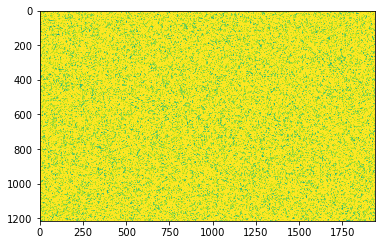

In [2]:
rng = np.random.default_rng(seed=42)

npixrow, npixcol = 1216, 1936
bgimg = rng.poisson(1, [npixrow, npixcol])

plt.imshow(bgimg, vmin=0, vmax=1)
plt.show()

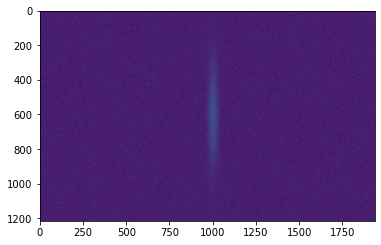

In [3]:

xvec = np.arange(0,npixcol, 1)
yvec = np.arange(0,npixrow, 1)

xx, yy = np.meshgrid(xvec, yvec)

zz = cl.gaussian(xx, 1000,20) * cl.gaussian(yy, 600,200)

snr = 2
intensitypeak = 1000
shgimg = (intensitypeak / (snr + 1) )*(snr*zz + bgimg)

plt.imshow(shgimg, vmin=0, vmax=2**12)
plt.show()

In [66]:
# np.savetxt( r'D:/Dropbox/RBT/4grit/laser/data/shg-test/shg-img-test_00.txt' , shgimg, delimiter=',', fmt='%1.4e')
np.save( r'D:/Dropbox/RBT/4grit/laser/data/shg-test/shg-img-test_01.npy' , shgimg)


In [55]:
shgimg = np.load(r'D:/Dropbox/RBT/4grit/laser/data/shg-test/shg-img-test_00.npy')

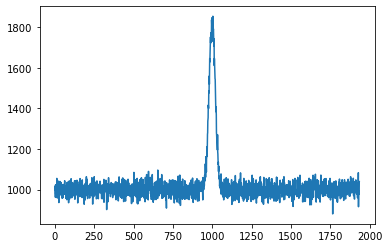

In [56]:
shglineout = np.mean(shgimg, axis=0)
shglineout.shape

plt.plot(shglineout)
plt.show()

In [59]:
%%timeit -r 10 -n 10

shgpeakwidth, peaks, peaks_props, shglineout = peak_fwhm(shgimg, prominence_min=250)


1.4 ms ± 110 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


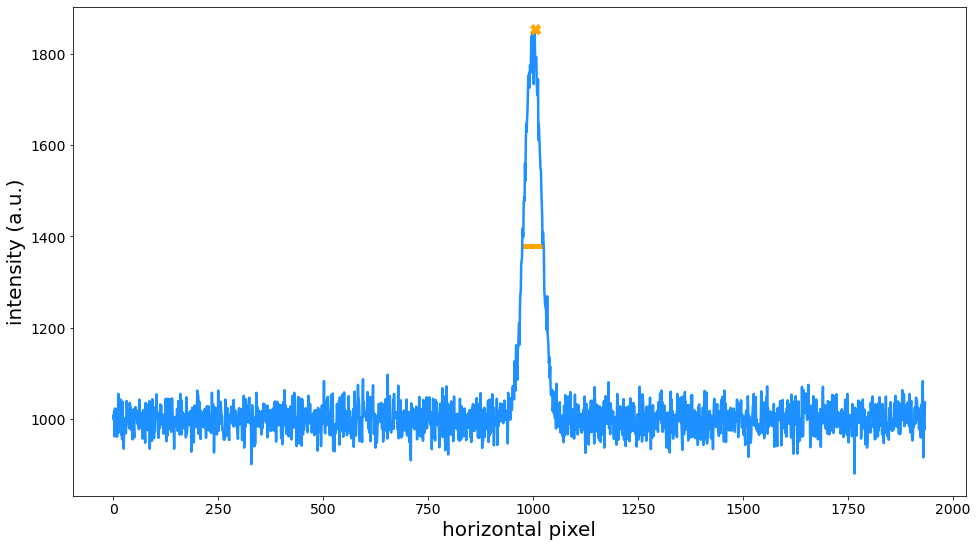

In [75]:
shgpeakwidth, peaks, peaks_props, shglineout = val.peak_fwhm(shgimg, prominence_min=250)

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,9), sharex=True)
ls = dict(linewidth=2.50,linestyle='-',marker='o',ms=0, mfc='None', color='dodgerblue', alpha=1)

ax.plot(shglineout, **ls)

ls = dict(linewidth=0,linestyle='-',marker='X',ms=10, color='orange', alpha=1)
ax.plot(peaks, shglineout[peaks], **ls)
ls = dict(linewidth=5,linestyle='-', color='orange', alpha=1)
ax.hlines(*shgpeakwidth[1:], **ls)

fs = dict(color='k', fontsize=20)
ax.set_ylabel('intensity (a.u.)',**fs)
ax.set_xlabel('horizontal pixel',**fs)
ax.tick_params(labelcolor='k', labelsize=14 )

plt.show()

In [51]:
peaks_props

KeyError: 1

In [64]:
2 * 20 * np.sqrt(2*np.log(2))

47.09640090061899

In [72]:
np.sqrt(2*np.log(2))


1.1774100225154747

In [73]:
150*7.5e-3

1.125

# Manta + Vimba Python API
---

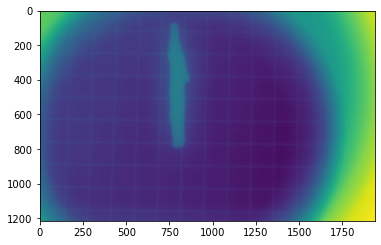

In [27]:
SAVE_PATH = r'D:/Dropbox/RBT/4grit/laser/data/shg-test/2021-08-13/'
SAVE_FN = r'frame_2021-08-13T09-58-10.npy'

test = np.load(SAVE_PATH+SAVE_FN)

plt.imshow(255 - test[:,:,0])

In [23]:

testlineout = np.mean(test, axis=0)
print(testlineout.shape)
print(test.shape)
print(test.max())
print(test.min())
# find_peaks(testlineout)

(1936, 1)
(1216, 1936, 1)
127
20


In [31]:
from scipy.signal import find_peaks, peak_widths

def peak_fwhm(shgimg, prominence_min=250, pixbit=8, invert=False, roi=[0, 1215, 0, 1935]):
    
    shgimg = shgimg[roi[0]:roi[1], roi[2]:roi[3]]

    if invert:
        shgimg = (2**pixbit - 1) - shgimg

    # get the mean lineout along the horizontal pixels
    shglineout = np.mean(shgimg, axis=0)
    # find the index locaiton of the peaks
    peaks, peaks_props = find_peaks(shglineout, prominence=(prominence_min, None))

    # 
    if len(peaks) > 1:
        peakmax = [ peaks[ peaks_props['prominences'].argmax() ] ]
        print('::: WARNING: Multiple peaks detected.')
        print('/// Only the most prominent peak is taken into FWHM calculation.')
        print('/// This is usually OK, but you could try increasing the prominence_min to correct for noise.')
    else:
        peakmax = peaks

    # find the peak width
    shgpeakwidth = peak_widths(shglineout, peakmax, rel_height=0.5)
    
    return shgpeakwidth, peakmax, peaks_props, shglineout

In [25]:
%%timeit -r 10 -n 10

shgpeakwidth, peaks, peaks_props, shglineout = peak_fwhm(test[:,:,0], prominence_min=250)


2.03 ms ± 165 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


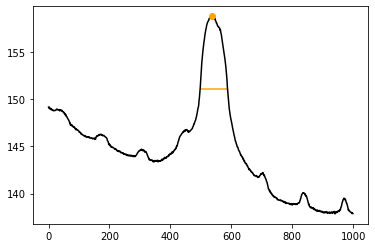

In [41]:
shgpeakwidth, peaks, peaks_props, shglineout = peak_fwhm(test[:,:,0], prominence_min=2, invert=True, roi=[0,1215,250,1250])

plt.plot(shglineout, color="k")
plt.plot(peaks, shglineout[peaks], 'o', color="orange")
plt.hlines(*shgpeakwidth[1:], color="orange")
plt.show()

In [44]:
print( *shgpeakwidth[1:] )

[151.08477366] [497.43632075] [587.5326087]


In [46]:
shgpeakwidth[0][0]

90.09628794093516

In [54]:
tt = 99

if tt == 'foo':
    print(tt)
else:
    try:
        assert type(tt) is str
        print('type(tt) == str checks out')
        print(tt)
    except AssertionError as error:
        print('this is the exception')
        print(error)

this is the exception

